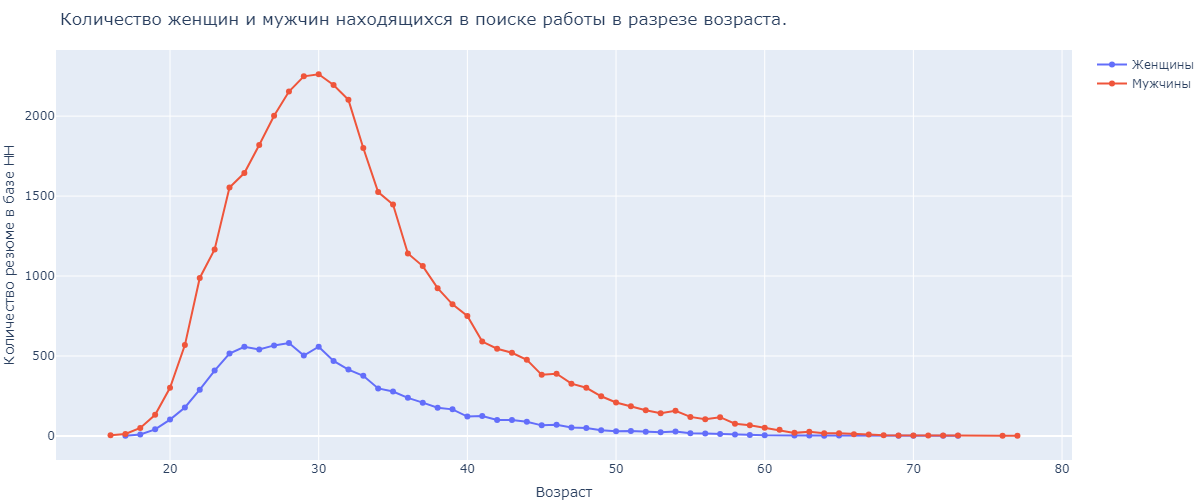<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from IPython.display import Image
from IPython.core.display import HTML
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [38]:
hh_df_origin = pd.read_csv('/content/drive/MyDrive/data/dst-3.0_16_1_hh_database.csv', sep=';')

In [39]:
## Делаем копию таблицы для удобства.
hh_df = hh_df_origin.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [40]:
hh_df.tail(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [41]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [42]:
hh_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [43]:
def clian_str(str):
    temp = str.split(' ')[:2]
    if temp[1] == 'образование': return temp[0]
    else: return ' '.join(temp)

hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(clian_str)
hh_df.drop('Образование и ВУЗ', axis=1, inplace=True)

hh_df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [44]:
## Функция для создания признака "Пол".
def column_gender(str):
    temp = (str.replace(' , ', '')).split(' ')[:2]
    if temp[0] == 'Мужчина': return "М"
    else: return "Ж"
##  Функция для создания признака "Возраст".
def column_age(str):
    temp = (str.replace(' , ', '')).split(' ')[:2]
    return int(temp[1])
## Создаём новые признаки и удаляем столбец "Пол, возраст".
hh_df['Пол'] = hh_df['Пол, возраст'].apply(column_gender)
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(column_age)
hh_df.drop('Пол, возраст', axis=1, inplace=True)

hh_df.head(3)

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [45]:
## Функция для создания признака "Опыт работы (месяц)".
def column_experience(str):
    if str is np.NaN or str == 'Не указано':
        return np.NaN
    list_year = ['год', 'года', 'лет']
    list_manth = ['месяца', 'месяцев', 'месяц']
    temp = str.split(' ')[:6]
    manth = 0

    for i, string in enumerate(temp):
        if string.isdigit() and temp[i+1] in list_year:
            manth += int(string) * 12
        if string.isdigit() and temp[i+1] in list_manth:
            manth += int(string)
    return manth
## Создаём новый признак и удаляем столбец "Опыт работы".
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(column_experience)
hh_df.drop('Опыт работы', axis=1, inplace=True)
hh_df.head(3)

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , …
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [46]:
## Функция для удаления станций метро и преобразования текста в список фраз.
def col_clian(text):
    text = text.split(' , ')
    if 'м.' in text[1]:
        text.pop(1)
    return text

## Функция для создания признака "Город".
def to_town(list_phrases):
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань',
                      'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                      'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    if list_phrases[0] in million_cities: return 'город-миллионник'
    if list_phrases[0] == 'Москва': return 'Москва'
    if list_phrases[0] == 'Санкт-Петербург': return 'Санкт-Петербург'
    else: return 'другие'

## Функция для создания признака "Готовность к переезду".
def func_moving(list_phrases):
    if 'не' in list_phrases[1]: return False
    else: return True

## Функция для создания признака "Готовность к командировкам".
def func_business_trips(list_phrases):
    if len(list_phrases) < 3 or 'не' in list_phrases[2]: return False
    else: return True

In [47]:
## Удаляем метро и преобразуем текст в список фраз.
hh_df['Город, переезд, командировки'] = hh_df['Город, переезд, командировки'].apply(col_clian)
## Создаём признак "Город"
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(to_town)
## Создаём признак "Готовность к переезду"
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(func_moving)
## Создаём признак "Готовность к командировкам"
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(func_business_trips)
## Удаляем столбец "Город, переезд, командировки"
hh_df.drop('Город, переезд, командировки', axis=1, inplace=True)
##
hh_df.head(3)

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,другие,False,False


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [48]:
## Функция для преобразования строки в список.
def col_list(text):
    text = text.split(', ')
    return text
## Преобразуем содержимое столбцов в список.
hh_df['Занятость'] = hh_df['Занятость'].apply(col_list)
hh_df['График'] = hh_df['График'].apply(col_list)
## Создаём дополнительные признаки из столбца "Занятость".
hh_df['полная занятость'] = hh_df['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
hh_df['частичная занятость'] = hh_df['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
hh_df['проектная работа'] = hh_df['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
hh_df['стажировка'] = hh_df['Занятость'].apply(lambda x: True if 'стажировка' in x else False)
hh_df['волонтерство'] = hh_df['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)
## Создаём дополнительные признаки из столбца "График".
hh_df['гибкий график'] = hh_df['График'].apply(lambda x: True if 'гибкий график' in x else False)
hh_df['полный день'] = hh_df['График'].apply(lambda x: True if 'полный день' in x else False)
hh_df['сменный график'] = hh_df['График'].apply(lambda x: True if 'сменный график' in x else False)
hh_df['удаленная работа'] = hh_df['График'].apply(lambda x: True if 'удаленная работа' in x else False)
hh_df['вахтовый метод'] = hh_df['График'].apply(lambda x: True if 'вахтовый метод' in x else False)
## Удаляем столбцы.
hh_df.drop('Занятость', axis=1, inplace=True)
hh_df.drop('График', axis=1, inplace=True)

hh_df.head(3)

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,полная занятость,частичная занятость,проектная работа,стажировка,волонтерство,гибкий график,полный день,сменный график,удаленная работа,вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0,...,True,True,True,False,False,True,True,True,True,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,...,True,False,False,False,False,False,True,False,False,False


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата,
* "proportion" - пропорция,
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [49]:
## Загрузка данных по курсам валют.
exchange_rates = pd.read_csv('/content/drive/MyDrive/data/ExchangeRates.csv')

## Преобразуем формат даты и удаляем лишние столбцы.
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True).dt.date
exchange_rates.drop(['per', 'time', 'vol'], axis=1, inplace=True)

## Преобразуем формат даты в таблице с резюме.
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst=True).dt.date

## Функция для отделения суммы от наименования валюты.
def func_salary(str):
    temp = str.split(' ')[:2]
    return int(temp[0])
## Создание временного признака "Сумма ЗП".
hh_df['Сумма ЗП'] = hh_df['ЗП'].apply(func_salary)

## Функция для создания признака наименования валюты по стандарту ISO.
def func_currency_name(str):
    currency_dict = {"грн":	"UAH", "USD":	"USD", "EUR":	"EUR", "бел.руб":	"BYN",
          "KGS":	"KGS", "сум":	"UZS", "AZN":	"AZN", "KZT": "KZT", "руб": "RUB"}
    temp = str.split(' ')[:2]
    name = temp[1].rstrip(".")
    if name in currency_dict:
        return currency_dict[name]
## Создание признака наименования вылюты "ISO".
hh_df['ISO'] = hh_df['ЗП'].apply(func_currency_name)
## Удаляем столбец "ЗП".
hh_df = hh_df.drop('ЗП', axis=1)

## Переименовываем некоторые столбцы для удобства слияния таблиц.
hh_df = hh_df.rename(columns={"Обновление резюме": "date"})
exchange_rates = exchange_rates.rename(columns={"currency": "ISO"})
           ## Меняем формат даты в таблицах для удобства объединения.
           ##exchange_rates['date'] = exchange_rates.date.astype('object')
           ##hh_df['date'] = hh_df.date.astype('object')

## Объединяем таблицы.
hh_df = hh_df.merge(exchange_rates.set_index(['date', 'ISO']), on=(['date', 'ISO']), how='left')

## Меняем значения NaN на 1.
hh_df = hh_df.fillna({'close': 1, 'proportion': 1})

## Добавляем признак "ЗП (руб)".
hh_df['ЗП (руб)'] = hh_df['Сумма ЗП'] * hh_df['close'] / hh_df['proportion']

## Удаляем лишние столбцы.
hh_df.drop(['Сумма ЗП', 'ISO', 'close', 'proportion'], axis=1, inplace=True)

hh_df.head(3)

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,date,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,стажировка,волонтерство,гибкий график,полный день,сменный график,удаленная работа,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,Высшее,М,60,233.0,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,False,True,False,False,False,20000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [50]:
fig = px.histogram(
    data_frame=hh_df,
    x='Возраст',
    nbins=100,
    title='Распределение соискателей по возрасту',
    width=700,
    height=500,
    marginal='box'
)
##fig.write_html("/content/drive/MyDrive/data/histogram_1.html")
fig.show()

> *  *Модальное значение возраста соискателей 30 лет.*
*  *Минимальный возраст соискателей 14 лет а максимальный   100  лет. Возраст большинства соискателей находится в интервале 24-36 лет.*
*  *Возраст соискателя 100 лет наверняка является аномалией, а вот соискатели в возрасте 76 и 77 лет возможно реальны.*



2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [52]:
fig = px.histogram(
    data_frame=hh_df,
    x='Опыт работы (месяц)',
    nbins=200,
    title='Распределение соискателей по опыту работы',
    width=1400,
    height=500,
    marginal='box'
)
##fig.write_html("/content/drive/MyDrive/data/histogram_2.html")
fig.show()

> *  *Модальное значение опыта соискателей 81 месяц.*
*  *Минимальный опыт соискателей 1 месяц а максимальный 663 месяца. Опыт большинства соискателей находится в интервале 20-150 месяцев.*
*  *Опыт соискателя 100 лет (1200 месяцев) является аномалией.*



3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [55]:
fig = px.histogram(
    data_frame=hh_df[hh_df['ЗП (руб)'] < 3000001],## Обрезаем зарплату выше 3000000 руб. для улучшения визуализации.
    x='ЗП (руб)',
    nbins=500,
    title='Распределение соискателей по желаемой зарплате',
    width=1400,
    height=500,
    marginal='box'
)
##fig.write_html("/content/drive/MyDrive/data/histogram_3.html")
fig.show()

> *  *Модальное значение зарплаты соискателей 50 000 руб.*
*  *Минимальная зарплата 1 руб, что скорее всего является аномалией а максимальная 24304876 руб., что тоже больше похоже на выброс. Желаемая зарплата большинства соискателей находится в интервале 30-100 тыс.руб.*
*  *Зарплаты выше 3000000 руб. являются выбросами.(скорее всего ошибочный ввод информации при заполнении).*



4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [57]:
df_median_salary = data_frame=hh_df[hh_df['ЗП (руб)'] < 100000]
df_median_salary = df_median_salary.groupby('Образование',
                          as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=df_median_salary,
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    height=400,
    width=600,
    title='Зависимость желаемой зарплаты от уровня образования',
)
##fig.write_html("/content/drive/MyDrive/data/histogram_4.html")
fig.show()

>
*  *Найбольший желаемый уровень зарплаты предъявляют обладатели высшего образования, наименьшие требования к размеру зарплаты у соискателей со средним специальным образованием.*
*  *При прогнозировании заработной платы уровень образования является очень важным признаком.*



5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [59]:
df_salary = hh_df[hh_df['ЗП (руб)'] < 1000000]

fig = px.box(
    data_frame=df_salary,
    x='ЗП (руб)',
    y='Город',
    color='Город',
    title='Распределение желаемой заработной платы в зависимости от города.',
    width=1200,
    height=500
)
##fig.write_html("/content/drive/MyDrive/data/histogram_5.html")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

>
*  *Найбольший размах как и медианный уровень желаемой заработной платы фиксируется в Москве, что не удивительно для столичного города. Санкт-Петербург ровно посередине между столицей и другими городами вместе с милионниками, так как их показатели фактически идентичны.*
*  *При прогнозировании заработной платы признок города необходимо учитывать, особенно если речь идёт о столице или культурной столице России.*



6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [61]:
df_med_sal_mov = hh_df.groupby(['Готовность к переезду', 'Готовность к командировкам'],
                          as_index=False)['ЗП (руб)'].median()
df_med_sal_mov['Готовность к переезду'] = df_med_sal_mov['Готовность к \
переезду'].apply(lambda x: 'Не готов' if x==False else 'Готов')
df_med_sal_mov['Готовность к командировкам'] = df_med_sal_mov['Готовность \
к командировкам'].apply(lambda x: 'Не готов' if x==False else 'Готов')

fig = px.histogram(
    data_frame=df_med_sal_mov,
    x='Готовность к переезду',
    y='ЗП (руб)',
    color='Готовность к командировкам',
    barmode="group",
    title="Зависимость медианной заработной платы от готовности к переезду и командировкам",
)
fig.update_layout(width=850, yaxis_title="Желаемая зарплата тыс.руб.")
##fig.write_html("/content/drive/MyDrive/data/histogram_6.html")
fig.show()

>
*  *У соискателей готовых и к переезду и к командировкам самый высокий запрос по размеру заработной платы, те же кто не готов ни к переезду ни к командировкам имеют минимальные запросы по уровню зарплаты.*




7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

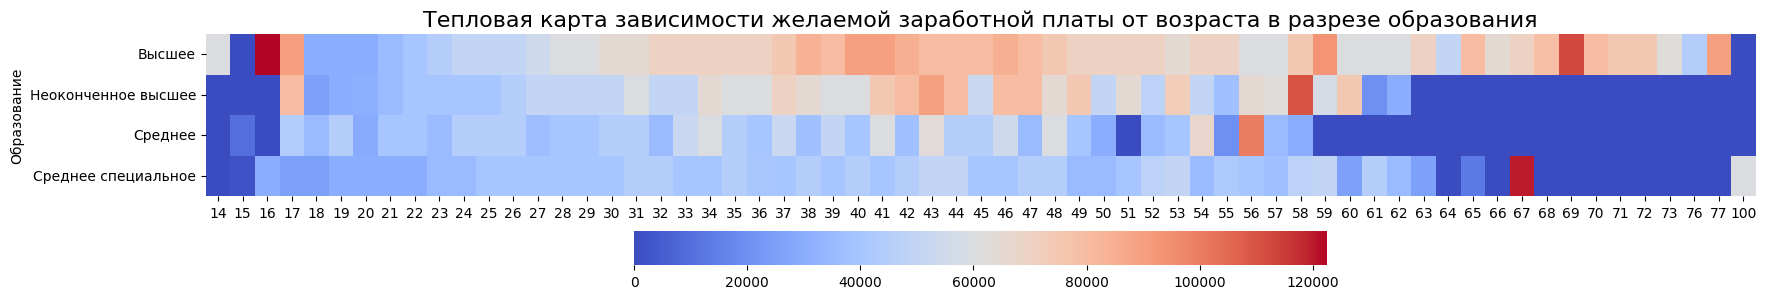

In [62]:
hh_df_pivot = pd.pivot_table(hh_df,
    index=["Образование"], values=["ЗП (руб)"], columns=["Возраст"], aggfunc=np.median, fill_value=0)
x=list(hh_df_pivot.columns)
age_list = []
for i in x: age_list.append(i[1])
hh_df_pivot.columns = age_list
plt.figure(figsize = (20, 3))
heatmap = sns.heatmap(data=hh_df_pivot, cmap="coolwarm", cbar_kws= {'orientation': 'horizontal'}) ## square=True)
heatmap.set_title('Тепловая карта зависимости желаемой заработной платы от возраста в разрезе образования', fontsize=16);

>
*  *У соискателей со средним специальным образованием требования к уровню зарплаты относительно невысоки и практически не меняются с возрастом.
У обладателей среднего образования имеется запрос на рост зарплаты с возрастом.
Соискатели с высшим и не оконченным высшим образованием на старте карьеры предъявляют завышенные требования к уровню зарплаты, не обладая при этом достаточным опытом работы. По мере погружения в действительность они соглашаются на уровень зарплаты предлагаемый рынком труда на старте карьеры. Далее по мере приобретения опыта и с возрастом требования по уровню зарплаты возрастают, при чём у обладателей высшего образования динамика роста начинается значительно раньше. Так же из графика можно сделать вывод что люди с высшим образованием продолжают успешно трудиться и в пенсионном возрасте, претендуя при этом на достаточно высокий уровень зарплат.*




8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [64]:
hh_df_year = hh_df.copy()
hh_df_year['Опыт работы (месяц)'] = hh_df_year['Опыт работы (месяц)']. fillna (0)
hh_df_year['Опыт работы (месяц)'] = hh_df_year['Опыт работы (месяц)'].apply(lambda x: 1 if x < 12 else round(x / 12))

fig = go.Figure()
fig.add_trace(trace=go.Scatter(
    x=hh_df_year['Возраст'],
    y=hh_df_year['Опыт работы (месяц)'],
    mode='markers',
    marker={'size': 7},
    name='Соискатели'
))
fig.add_trace(go.Scatter(
    x=[0, 100],
    y=[0, 100],
    mode='lines',
    name='Граница аномалий'
))
fig.update_layout(title="Зависимость опыта работы от возраста", xaxis_title="Возраст",
                  yaxis_title="Опыт работы", title_x = 0.5,
                  height=600, width=1000, legend_orientation="h",
                  margin=dict(l=70, r=20, t=50, b=0), legend=dict(x=.5, xanchor="center")
                  )
##fig.write_html("/content/drive/MyDrive/data/histogram_7.html")
fig.show()

>
*  *Семеро соискателей указали нереальный опыт работы, превышающий их возраст. Эти данные являются аномальными.*




**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [66]:
hh_df_dop = hh_df.copy()
hh_df_dop = hh_df_dop[hh_df_dop['ЗП (руб)'] < 1000000]
hh_df_dop = hh_df_dop[hh_df_dop['Возраст'] < 100]
fig = px.scatter(
    data_frame=hh_df_dop,
    x='Возраст',
    y='ЗП (руб)',
    color='Пол',
    title='Распределение желаемого уровня зарплаты в разрезе полового признака',
    width=1200,
   )
##fig.write_html("/content/drive/MyDrive/data/histogram_8.html")
fig.show()

>
*  *Из представленного графика видно что у мужчин ожидания по заработной плате выше, при чём данная тенденция прслеживается в течении всего карьерного пути соискателей.*
*  *Так же видно что после 55 лет соотношение соискателей женского пола сокращается в геометрической прогрессии по отношению к соискателям мужского пола.*
*  *Ещё можно сделать вывод что в подростковом возрасте трудовой деятельностью интересуются в основной массе юноши.*




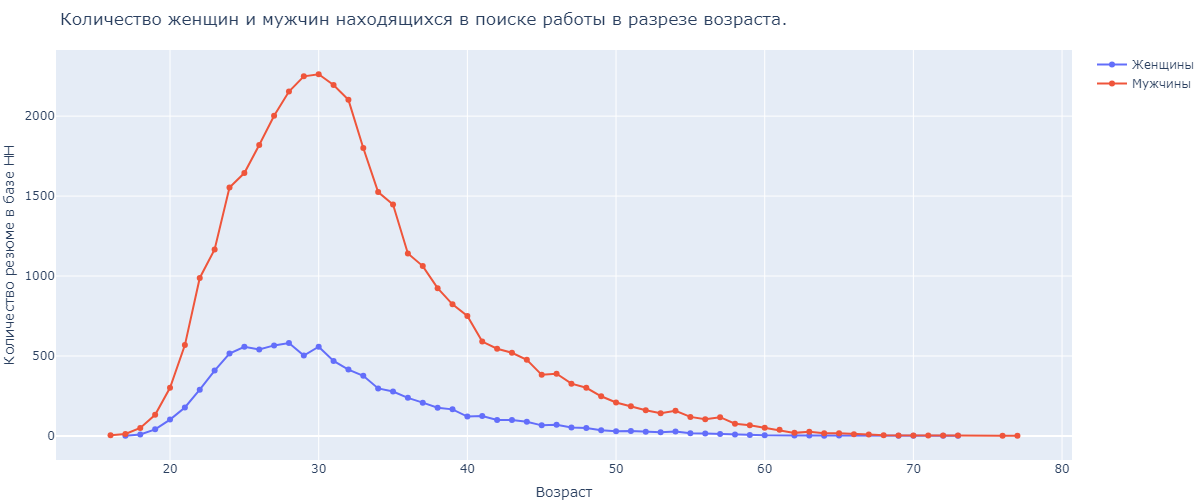

In [96]:
hh_df_dop2 = hh_df.copy()
hh_df_dop2_women = hh_df_dop2[hh_df_dop2['Пол'] == 'Ж']
hh_df_dop2_men = hh_df_dop2[hh_df_dop2['Пол'] == 'М']
df_dop2_women = hh_df_dop2_women.groupby('Возраст', as_index=False)['date'].count()
df_dop2_men = hh_df_dop2_men.groupby('Возраст', as_index=False)['date'].count()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_dop2_women['Возраст'], y=df_dop2_women['date'], name= 'Женщины', mode='lines+markers'))
fig.add_trace(go.Scatter(x=df_dop2_men['Возраст'], y=df_dop2_men['date'], name= 'Мужчины', mode='lines+markers'))
fig.update_layout(title="Количество женщин и мужчин находящихся в поиске работы в разрезе возраста.",
                  xaxis_title="Возраст", yaxis_title="Количество резюме в базе HH",
                  margin=dict(l=0, r=0, t=50, b=0), height=500,width=1200)
##fig.write_html("/content/drive/MyDrive/data/histogram_9.html")
fig.show()
Image("/content/drive/MyDrive/data/newplot_10.png", width=1200, height=500)

>
*  *Глядя на график можно подумать что желающих работать женщин гораздо меньше чем мужчин. Но скорее всего женщины просто реже прибегают к помощи НН при поиске работы, поэтому наблюдается такой дисбаланс.*
*  *Видим что пиковый возраст поиска работы у мужчин 30 лет.*
*  *Видим плато максимума на женском графике от 25 до 30 лет, возможно это связано с выходом из декретных отпусков.*




# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [69]:
hh_df_dupl = hh_df[hh_df.duplicated()]
hh_df = hh_df.drop_duplicates()
print(hh_df_dupl.shape[0])

161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [70]:
hh_df.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
date                                 0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
стажировка                           0
волонтерство                         0
гибкий график                        0
полный день                          0
сменный график                       0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [71]:
hh_df.dropna(axis=0, how='any', subset=['Последнее/нынешнее место работы','Последняя/нынешняя должность'], inplace=True)
hh_df.fillna(value=hh_df['Опыт работы (месяц)'].median(), inplace=True)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [72]:
hh_df = hh_df[(hh_df['ЗП (руб)'] <= 1000000) & (hh_df['ЗП (руб)'] >= 1000)]

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [73]:
hh_df = hh_df[hh_df['Возраст'] > hh_df['Опыт работы (месяц)'] / 12]

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

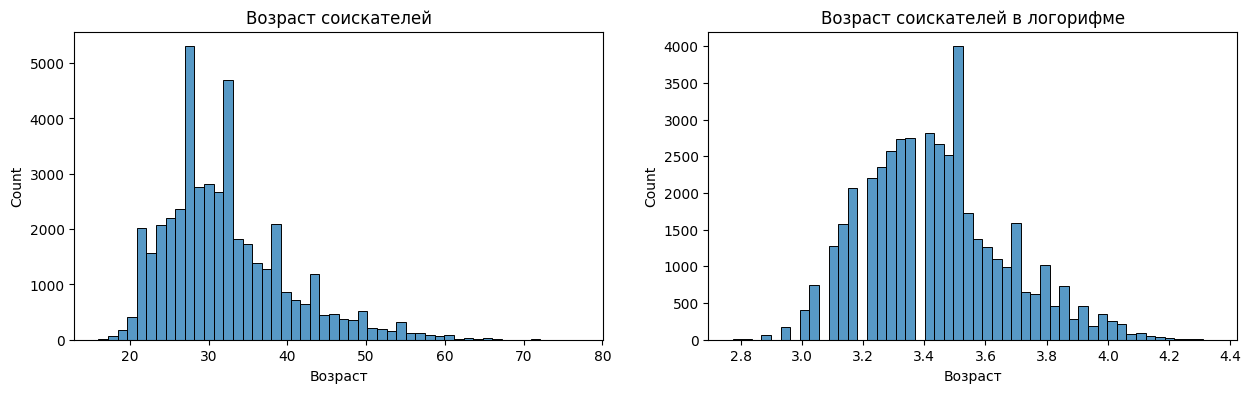

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма признака в исходном состоянии
histplot = sns.histplot(hh_df['Возраст'], bins=50, ax=axes[0])
histplot.set_title('Возраст соискателей');

#гистограмма признака в логарифмическом масштабе
log_age = np.log(hh_df['Возраст'])
histplot = sns.histplot(log_age , bins=50, ax=axes[1])
histplot.set_title('Возраст соискателей в логорифме');

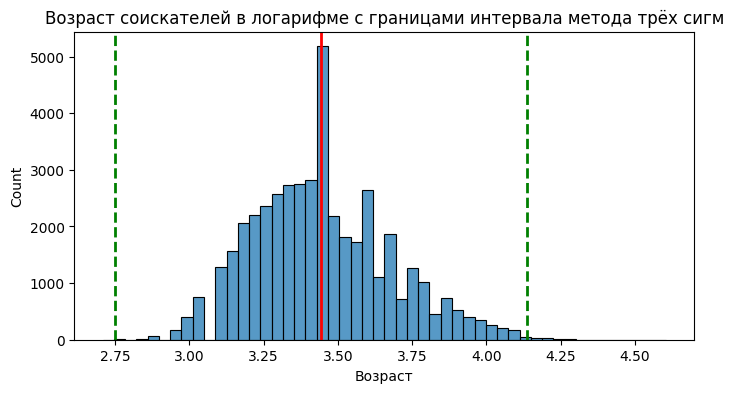

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_df['Возраст'])
histplot = sns.histplot(log_age, bins=50, ax=ax)
histplot.axvline(log_age.mean(), color='r', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='g', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='g', ls='--', lw=2)
histplot.set_title('Возраст соискателей в логарифме с границами интервала метода трёх сигм');

In [77]:
## Функция для очистки данных по методу Z отклонения.
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(hh_df['Возраст'])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
## Применяем функцию очистки к признаку "Возраст" таблицы с резюме соискателей.
outliers, hh_df = outliers_z_score(hh_df, 'Возраст', log_scale=True, left=3, right=4)

In [78]:
print(f'Результирующее число записей: {hh_df.shape[0]}')
print()
print(f'Число выбросов по методу z-отклонения c с послаблением: {outliers.shape[0]}')
print()
outliers

Результирующее число записей: 44482

Число выбросов по методу z-отклонения c с послаблением: 3



,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,date,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,стажировка,волонтерство,гибкий график,полный день,сменный график,удаленная работа,вахтовый метод,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,True,False,False,False,True,False,True,True,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,другие,...,False,False,False,False,False,True,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,False,True,True,False,True,False,60000.0


>
*  *Логарифмическое распределение ассимитрично в левую сторону.*
*  *Под категорию выбросов, с учётом послабления в правую сторону на 1 сигму, попали соискатели в возрасте 15 и 100 лет.*



